# Circadian amplitude boost plots

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# St. Hilaire 12 light schedule (1 hr light pulse)

## Load experimental data

In [33]:
data_path = "hilaire_12_Fig3A_digitized_data.csv"
experimental_data = pd.read_csv(data_path)

## Load simulation result

In [35]:
simulation_result = np.load('simulation_result_1hr_pulse_constant_routine.npy', allow_pickle=True).item()

In [36]:
model_list = simulation_result['model_list']
pulse_num = simulation_result['pulse_num']
first_constant_routine_duration = simulation_result['first_constant_routine_duration']

## Plot setup

In [37]:
colors = {
    'Forger99': 'lightseagreen',
    'Jewett99': 'lightseagreen',
    'Hannay19': 'blueviolet',
    'Hannay19TP': 'blueviolet',
}
linestyles = {
    'Forger99': '-',
    'Jewett99': '--',
    'Hannay19': '-',
    'Hannay19TP': '--',
}
phase_shift_offset = 0.54

## PRC

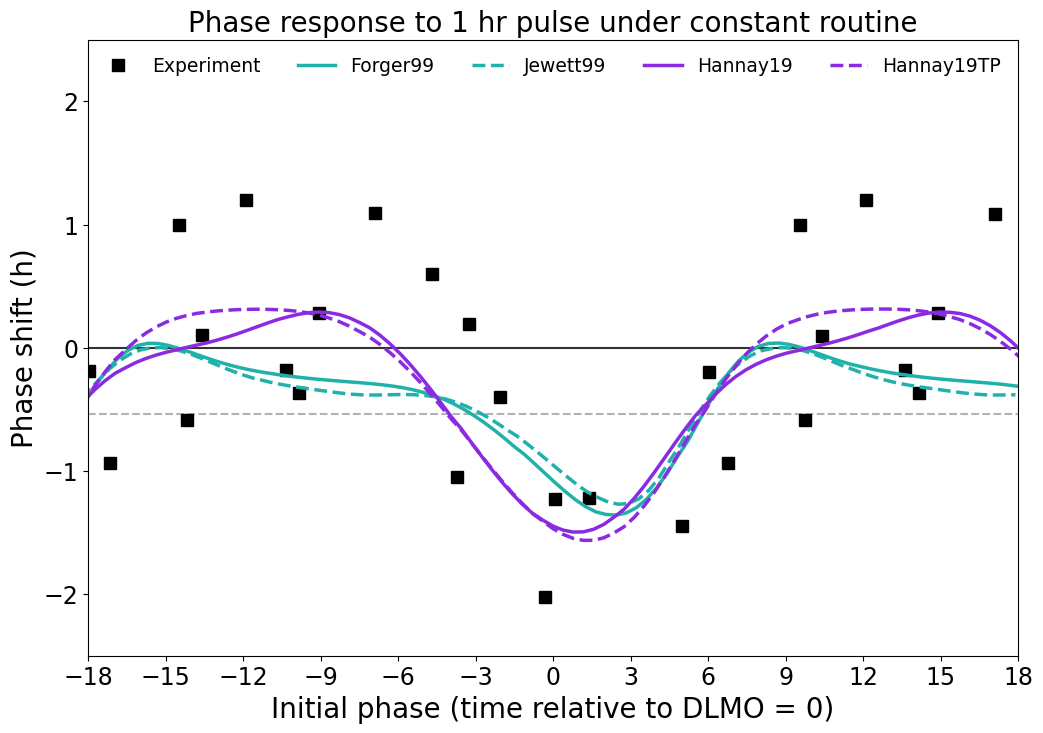

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
# experimental data
plt.plot(experimental_data['initial_phase'], 
         experimental_data['phase_shift'], 's', markersize=8,
         label='Experiment', color='black')
# simulation results
for idx,model in enumerate(model_list):
    x = []
    y = simulation_result[str(model)]['phase_response'] - phase_shift_offset
    # calculate the initial phase
    for CR1_index in range(pulse_num):
        CR1_duration = first_constant_routine_duration[CR1_index]
        pulse_mid_time = 24*3 + 8 + CR1_duration + 8 + 8
        dlmo = simulation_result[str(model)]['reference_dlmo']
        x.append(pulse_mid_time - dlmo)
    plt.plot(x, y, label=str(model), lw=2.5,
             color=colors[str(model)], linestyle=linestyles[str(model)])
# styling
plt.axhline(y=0, color='black', zorder=0, alpha=0.8)
plt.axhline(y=-0.54, color='black', linestyle='--', zorder=0, alpha=0.3)
plt.xlabel('Initial phase (time relative to DLMO = 0)', fontsize=20)
plt.ylabel('Phase shift (h)', fontsize=20)
plt.xlim(-18, 18)
plt.ylim(-2.5, 2.5)
plt.xticks(np.linspace(-18, 18, 13), fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=13.5, frameon=False, ncol=5)
plt.title("Phase response to 1 hr pulse under constant routine", fontsize=20)
plt.show()

## ARC

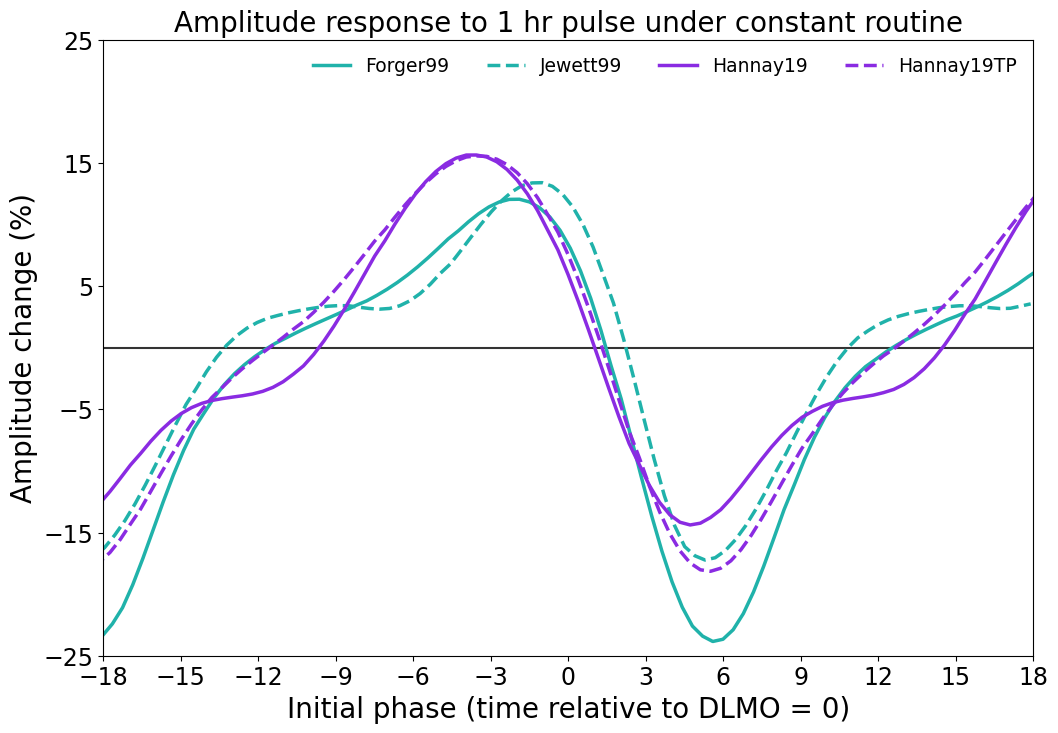

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
# simulation results
for idx,model in enumerate(model_list):
    x = []
    y = simulation_result[str(model)]['amplitude_response']
    # calculate the initial phase
    for CR1_index in range(pulse_num):
        CR1_duration = first_constant_routine_duration[CR1_index]
        pulse_mid_time = 24*3 + 8 + CR1_duration + 8 + 8
        dlmo = simulation_result[str(model)]['reference_dlmo']
        x.append(pulse_mid_time - dlmo)
    plt.plot(x, y, label=str(model), lw=2.5,
             color=colors[str(model)], linestyle=linestyles[str(model)])
# styling
plt.axhline(y=0, color='black', zorder=0, alpha=0.8)
plt.xlabel('Initial phase (time relative to DLMO = 0)', fontsize=20)
plt.ylabel('Amplitude change (%)', fontsize=20)
plt.xlim(-18, 18)
plt.ylim(-25, 25)
plt.xticks(np.linspace(-18, 18, 13), fontsize=17)
plt.yticks(np.linspace(-25, 25, 6), fontsize=17)
plt.legend(fontsize=13.5, frameon=False, ncol=5)
plt.title("Amplitude response to 1 hr pulse under constant routine", fontsize=20)
plt.show()

## Compare simulation with Hannay et al. 19

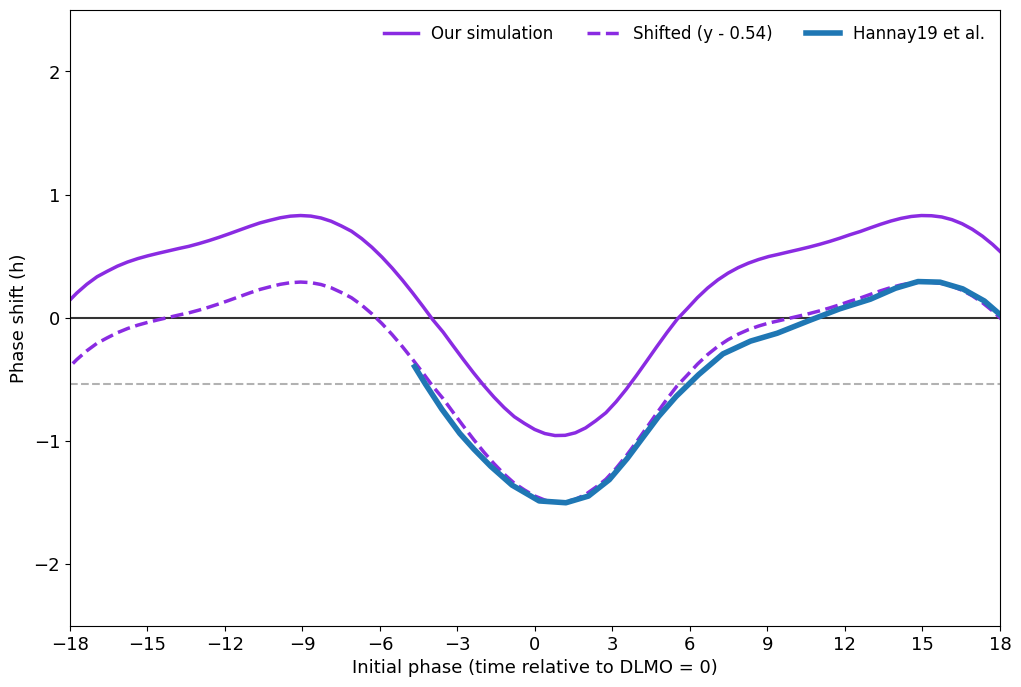

In [40]:
hannay_19_simulation = pd.read_csv('hannay_19_short_pulse_simulation.csv', header=None, names=['CT', 'phase_shift'])

## Create the initial phase column
time_shift = 4.75
hannay_19_simulation['initial_phase'] = hannay_19_simulation['CT'] - time_shift
## Reorder rows by initial_phase
hannay_19_simulation = hannay_19_simulation.sort_values(by='initial_phase')

model = 'Hannay19'
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
# simulation results
x = []
y = simulation_result[str(model)]['phase_response']
# calculate the initial phase
for CR1_index in range(pulse_num):
    CR1_duration = first_constant_routine_duration[CR1_index]
    pulse_mid_time = 24*3 + 8 + CR1_duration + 8 + 8
    dlmo = simulation_result[str(model)]['reference_dlmo']
    x.append(pulse_mid_time - dlmo)
plt.plot(x, y, label='Our simulation', lw=2.5,
            color=colors[str(model)], linestyle=linestyles[str(model)])
plt.plot(x, y - 0.54, label='Shifted (y - 0.54)', lw=2.5,
            color=colors[str(model)], linestyle='--')
# hannay 19 results for hannay
plt.plot(hannay_19_simulation['initial_phase'],
        hannay_19_simulation['phase_shift'], 
        label='Hannay19 et al.', lw=4, color='tab:blue',
        )
# styling
plt.axhline(y=0, color='black', zorder=0, alpha=0.8)
plt.axhline(y=-0.54, color='black', linestyle='--', zorder=0, alpha=0.3)
plt.xlabel('Initial phase (time relative to DLMO = 0)', fontsize=13)
plt.ylabel('Phase shift (h)', fontsize=13)
plt.xlim(-18, 18)
plt.ylim(-2.5, 2.5)
plt.xticks(np.linspace(-18, 18, 13), fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12, frameon=False, ncol=5)
plt.show()

# Ruger 12 light schedule (6.5 h light pulse)

## Load experimental data

In [41]:
data_path = "ruger_12_Fig2_digitized_data.csv"
experimental_data = pd.read_csv(data_path)

## Load simuation result

In [42]:
simulation_result = np.load('simulation_result_6-5hr_pulse_constant_routine.npy', allow_pickle=True).item()

In [43]:
model_list = simulation_result['model_list']
pulse_num = simulation_result['pulse_num']
first_constant_routine_duration = simulation_result['first_constant_routine_duration']
pulse_duration = simulation_result['pulse_duration']

## Plot setup

In [44]:
colors = {
    'Forger99': 'lightseagreen',
    'Jewett99': 'lightseagreen',
    'Hannay19': 'blueviolet',
    'Hannay19TP': 'blueviolet',
}
linestyles = {
    'Forger99': '-',
    'Jewett99': '--',
    'Hannay19': '-',
    'Hannay19TP': '--',
}
phase_shift_offset = 0.54

## PRC

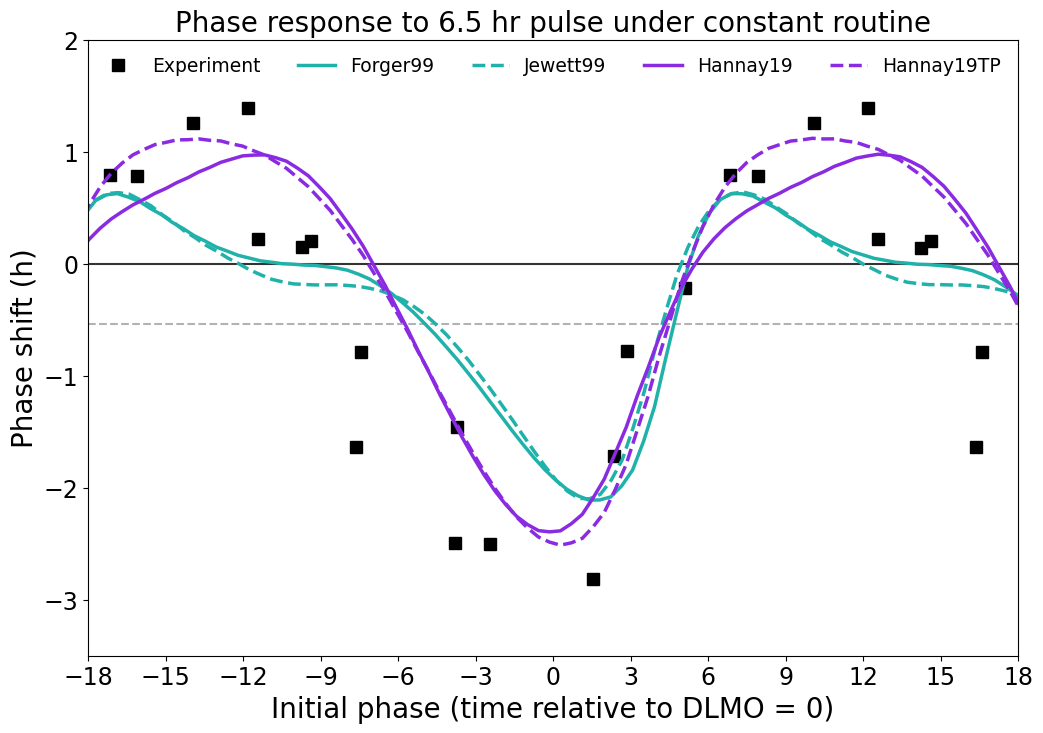

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
# experimental data
plt.plot(experimental_data['initial_phase'], 
         experimental_data['phase_shift'], 's', markersize=8,
         label='Experiment', color='black')
# simulation results
for idx,model in enumerate(model_list):
    x = []
    y = simulation_result[str(model)]['phase_response'] - phase_shift_offset
    # calculate the initial phase
    for CR1_index in range(pulse_num):
        CR1_duration = first_constant_routine_duration[CR1_index]
        ## Different from Hilaire 12
        pulse_mid_time = 24*3 + 8 + CR1_duration + 8 + 8
        pulse_start_time = pulse_mid_time - pulse_duration/2
        dlmo = simulation_result[str(model)]['reference_dlmo']
        x.append(pulse_start_time - dlmo)
    plt.plot(x, y, label=str(model), lw=2.5,
             color=colors[str(model)], linestyle=linestyles[str(model)])
# styling
plt.axhline(y=0, color='black', zorder=0, alpha=0.8)
plt.axhline(y=-0.54, color='black', linestyle='--', zorder=0, alpha=0.3)
plt.xlabel('Initial phase (time relative to DLMO = 0)', fontsize=20)
plt.ylabel('Phase shift (h)', fontsize=20)
plt.xlim(-18, 18)
plt.ylim(-3.5, 2)
plt.xticks(np.linspace(-18, 18, 13), fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=13.5, frameon=False, ncol=5)
plt.title("Phase response to 6.5 hr pulse under constant routine", fontsize=20)
plt.show()

## ARC

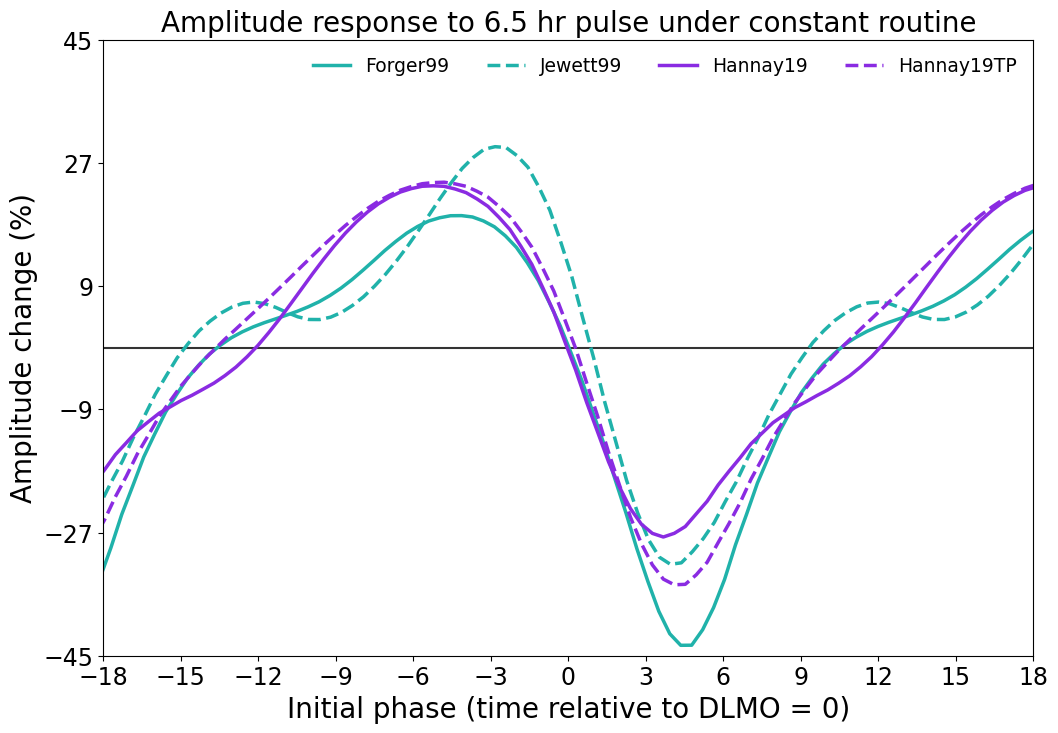

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
# simulation results
for idx,model in enumerate(model_list):
    x = []
    y = simulation_result[str(model)]['amplitude_response']
    # calculate the initial phase
    for CR1_index in range(pulse_num):
        CR1_duration = first_constant_routine_duration[CR1_index]
        ## Different from Hilaire 12
        pulse_mid_time = 24*3 + 8 + CR1_duration + 8 + 8
        pulse_start_time = pulse_mid_time - pulse_duration/2
        dlmo = simulation_result[str(model)]['reference_dlmo']
        x.append(pulse_start_time - dlmo)
    plt.plot(x, y, label=str(model), lw=2.5,
             color=colors[str(model)], linestyle=linestyles[str(model)])
# styling
plt.axhline(y=0, color='black', zorder=0, alpha=0.8)
plt.xlabel('Initial phase (time relative to DLMO = 0)', fontsize=20)
plt.ylabel('Amplitude change (%)', fontsize=20)
plt.xlim(-18, 18)
plt.ylim(-25, 25)
plt.xticks(np.linspace(-18, 18, 13), fontsize=17)
plt.yticks(np.linspace(-45, 45, 6), fontsize=17)
plt.legend(fontsize=13.5, frameon=False, ncol=5)
plt.title("Amplitude response to 6.5 hr pulse under constant routine", fontsize=20)
plt.show()

## Compare simulation with Hannay et al. 19

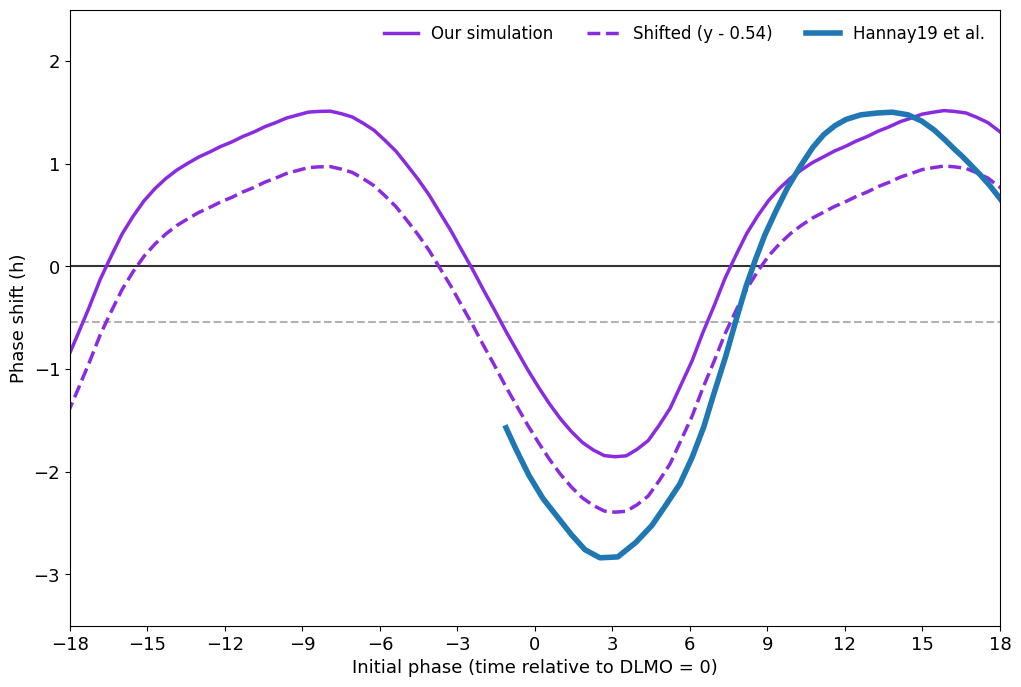

In [56]:
hannay_19_simulation = pd.read_csv('hannay_19_long_pulse_simulation.csv', header=None, names=['CT', 'phase_shift'])

## Create the initial phase column
time_shift = 1.1
hannay_19_simulation['initial_phase'] = hannay_19_simulation['CT'] - time_shift
## Reorder rows by initial_phase
hannay_19_simulation = hannay_19_simulation.sort_values(by='initial_phase')

model = 'Hannay19'
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
# simulation results
x = []
y = simulation_result[str(model)]['phase_response']
# calculate the initial phase
for CR1_index in range(pulse_num):
    CR1_duration = first_constant_routine_duration[CR1_index]
    pulse_mid_time = 24*3 + 8 + CR1_duration + 8 + 8
    dlmo = simulation_result[str(model)]['reference_dlmo']
    x.append(pulse_mid_time - dlmo)
plt.plot(x, y, label='Our simulation', lw=2.5,
            color=colors[str(model)], linestyle=linestyles[str(model)])
plt.plot(x, y - 0.54, label='Shifted (y - 0.54)', lw=2.5,
            color=colors[str(model)], linestyle='--')
# hannay 19 results for hannay
plt.plot(hannay_19_simulation['initial_phase'],
        hannay_19_simulation['phase_shift'], 
        label='Hannay19 et al.', lw=4, color='tab:blue',
        )
# styling
plt.axhline(y=0, color='black', zorder=0, alpha=0.8)
plt.axhline(y=-0.54, color='black', linestyle='--', zorder=0, alpha=0.3)
plt.xlabel('Initial phase (time relative to DLMO = 0)', fontsize=13)
plt.ylabel('Phase shift (h)', fontsize=13)
plt.xlim(-18, 18)
plt.ylim(-3.5, 2.5)
plt.xticks(np.linspace(-18, 18, 13), fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12, frameon=False, ncol=5)
plt.show()

# Regular schedule (1 hr light pulse)

## Load simulation result

In [6]:
simulation_result = np.load('simulation_result_1hr_pulse_regular_schedule.npy', allow_pickle=True).item()

In [7]:
model_list = simulation_result['model_list']
pulse_num = simulation_result['pulse_num']
pulse_start_values = simulation_result['pulse_start_values']
pulse_duration = simulation_result['pulse_duration']

## Plot setup

In [8]:
colors = {
    'Forger99': 'lightseagreen',
    'Jewett99': 'lightseagreen',
    'Hannay19': 'blueviolet',
    'Hannay19TP': 'blueviolet',
}
linestyles = {
    'Forger99': '-',
    'Jewett99': '--',
    'Hannay19': '-',
    'Hannay19TP': '--',
}
phase_shift_offset = 0.0

## PRC

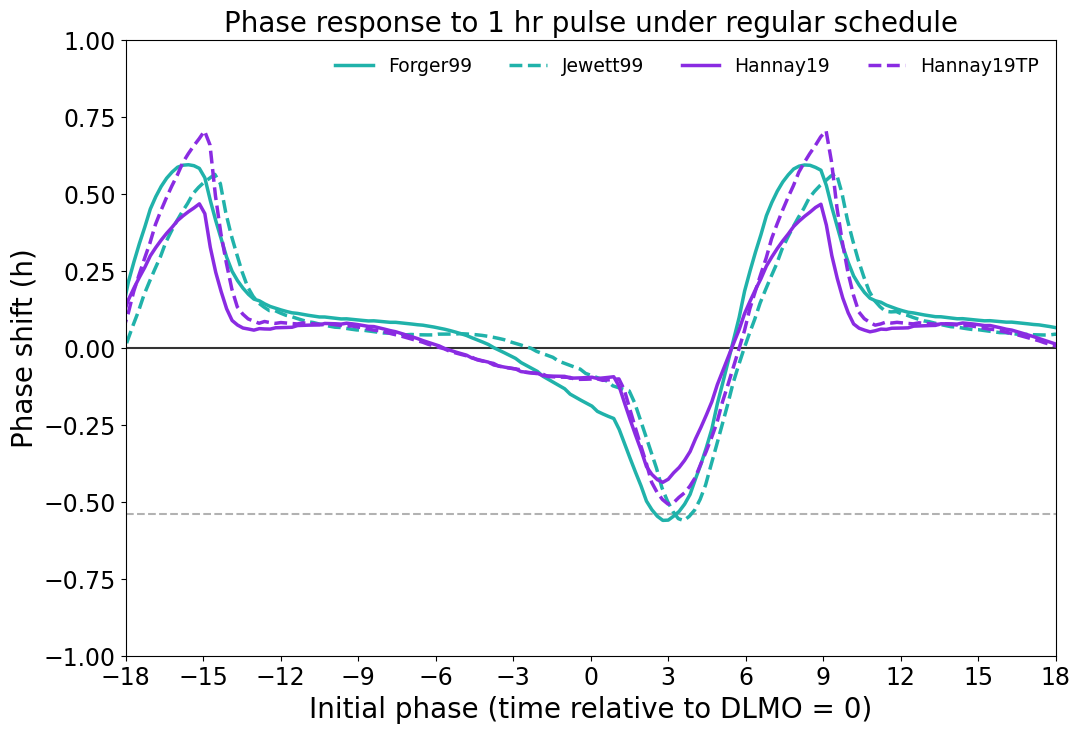

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
# simulation results
for idx,model in enumerate(model_list):
    x = []
    y = simulation_result[str(model)]['phase_response'] - phase_shift_offset
    # calculate the initial phase
    for pulse_index in range(pulse_num):
        pulse_start = pulse_start_values[pulse_index]
        pulse_mid_time = pulse_start + pulse_duration/2
        dlmo = simulation_result[str(model)]['reference_dlmo']
        x.append(pulse_mid_time - dlmo)
    plt.plot(x, y, label=str(model), lw=2.5,
             color=colors[str(model)], linestyle=linestyles[str(model)])
# styling
plt.axhline(y=0, color='black', zorder=0, alpha=0.8)
plt.axhline(y=-0.54, color='black', linestyle='--', zorder=0, alpha=0.3)
plt.xlabel('Initial phase (time relative to DLMO = 0)', fontsize=20)
plt.ylabel('Phase shift (h)', fontsize=20)
plt.xlim(-18, 18)
plt.ylim(-1, 1)
plt.xticks(np.linspace(-18, 18, 13), fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=13.5, frameon=False, ncol=5)
plt.title("Phase response to 1 hr pulse under regular schedule", fontsize=20)
plt.show()

## ARC

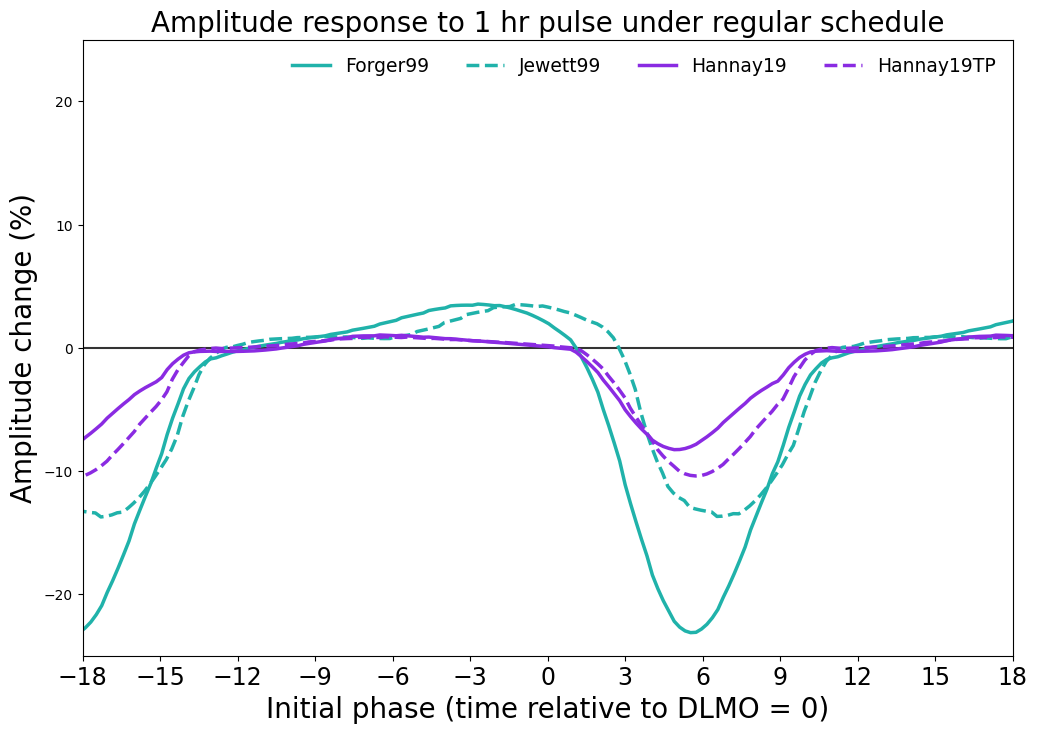

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
# simulation results
for idx,model in enumerate(model_list):
    x = []
    y = simulation_result[str(model)]['amplitude_response']
    # calculate the initial phase
    for pulse_index in range(pulse_num):
        pulse_start = pulse_start_values[pulse_index]
        pulse_mid_time = pulse_start + pulse_duration/2
        dlmo = simulation_result[str(model)]['reference_dlmo']
        x.append(pulse_mid_time - dlmo)
    plt.plot(x, y, label=str(model), lw=2.5,
             color=colors[str(model)], linestyle=linestyles[str(model)])
# styling
plt.axhline(y=0, color='black', zorder=0, alpha=0.8)
plt.xlabel('Initial phase (time relative to DLMO = 0)', fontsize=20)
plt.ylabel('Amplitude change (%)', fontsize=20)
plt.xlim(-18, 18)
plt.ylim(-25, 25)
plt.xticks(np.linspace(-18, 18, 13), fontsize=17)
# plt.yticks(np.linspace(-25, 25, 6), fontsize=17)
plt.legend(fontsize=13.5, frameon=False, ncol=5)
plt.title("Amplitude response to 1 hr pulse under regular schedule", fontsize=20)
plt.show()

## Load trajectories

In [7]:
trajectories = np.load("trajectories_1hr_pulse_regular_schedule.npy", allow_pickle=True).item()

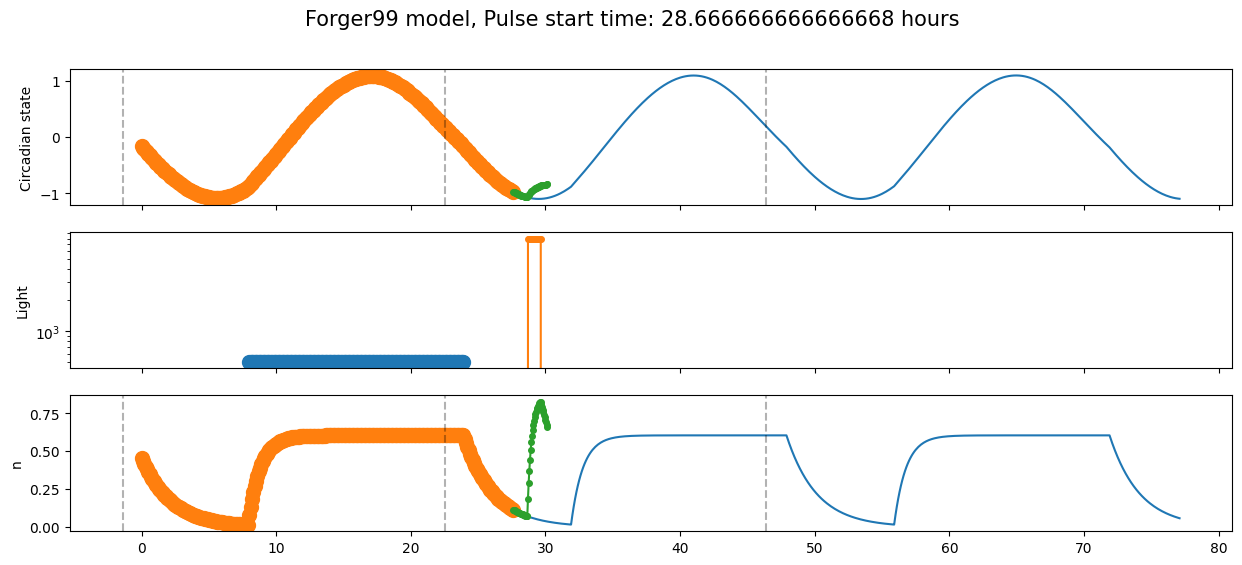

In [20]:
pulse_index = 1
model = 'Forger99'
trajectory = trajectories[model][str(pulse_index)]
# initial_phase = time - trajectory['control_dlmos'][6]
fig, axs = plt.subplots(3, 1, sharex=True)
fig.set_size_inches(15, 6)
# title
fig.suptitle(f'Forger99 model, Pulse start time: {pulse_start_values[pulse_index]} hours', fontsize=15)
axs[0].plot(trajectory['control'].time, 
            trajectory['control'].states[:,0], label='Control')
axs[0].plot(trajectory['pulse_first_part'].time, 
            trajectory['pulse_first_part'].states[:,0], label='Pulse first sim', marker='o', markersize=10)
axs[0].plot(trajectory['pulse_second_part'].time, 
            trajectory['pulse_second_part'].states[:,0], label='Pulse first sim', marker='o', markersize=4)
axs[0].set_ylabel("Circadian state")
# plot dlmos as vertical dashed lines
for dlmo in trajectory['control_dlmos']:
    axs[0].axvline(x=dlmo, color='black', linestyle='--', alpha=0.3)

axs[1].plot(trajectory['pulse_first_part'].time, 
            trajectory['light_first_part'], label='Light', marker='o', markersize=10)
axs[1].plot(trajectory['pulse_second_part'].time, 
            trajectory['light_second_part'], label='Light', marker='o', markersize=4)
axs[1].set_ylabel("Light")
axs[1].set_yscale('log')

axs[2].plot(trajectory['control'].time, 
            trajectory['control'].states[:,2], label='Control')
axs[2].plot(trajectory['pulse_first_part'].time, 
            trajectory['pulse_first_part'].states[:,2], label='Pulse first sim', marker='o', markersize=10)
axs[2].plot(trajectory['pulse_second_part'].time, 
            trajectory['pulse_second_part'].states[:,2], label='Pulse first sim', marker='o', markersize=4)
axs[2].set_ylabel("n")
# plot dlmos as vertical dashed lines
for dlmo in trajectory['control_dlmos']:
    axs[2].axvline(x=dlmo, color='black', linestyle='--', alpha=0.3)

pulse_mid_time = pulse_start_values[pulse_index] + pulse_duration/2
# axs[1].set_xlim(pulse_mid_time - 2.5, pulse_mid_time + 2.5)
plt.show()

## Response of n variable to pulses

### Compare all n variables for the control schedule

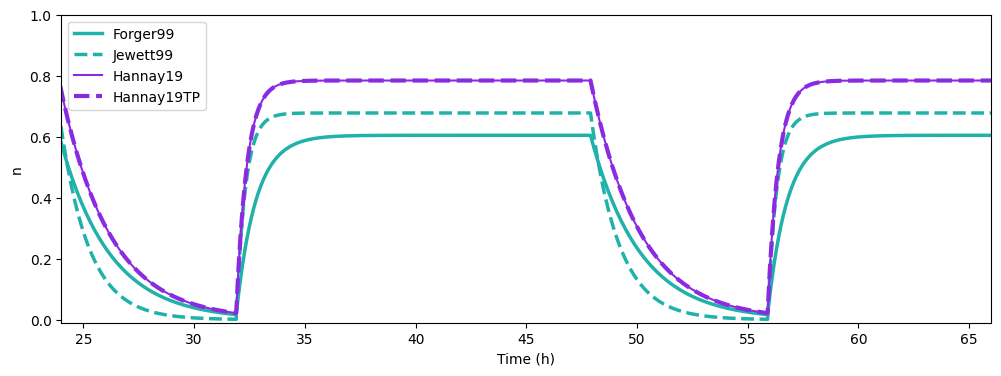

In [33]:
n_variable_index = {
    'Forger99': 2,
    'Jewett99': 2,
    'Hannay19': 2,
    'Hannay19TP': 4,
}
linewidths = {
    'Forger99': 2.5,
    'Jewett99': 2.5,
    'Hannay19': 1.5,
    'Hannay19TP': 3.0,
}
fig, ax = plt.subplots(1, 1, figsize=(12, 4), sharex=True, sharey=True)
for i, model in enumerate(model_list):
    n_index = n_variable_index[str(model)]
    # Control
    control_trajectory = trajectories[str(model)][str(0)]['control']
    ax.plot(control_trajectory.time, control_trajectory.states[:,n_index], label=str(model),
            color=colors[str(model)], linestyle=linestyles[str(model)], lw=linewidths[str(model)])

ax.legend()
ax.set_ylabel("n")
plt.xlim(24, 66)
plt.ylim(-0.01, 1.0)
plt.xlabel("Time (h)")
plt.show()

### Compare how all models respond to the 1 hr light pulse

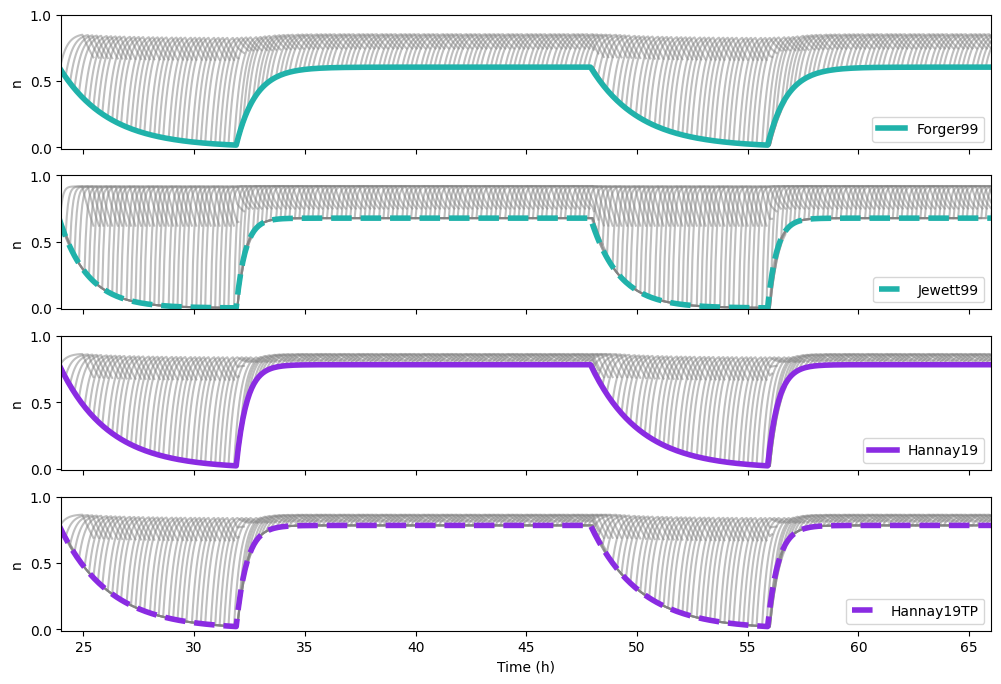

In [32]:
n_variable_index = {
    'Forger99': 2,
    'Jewett99': 2,
    'Hannay19': 2,
    'Hannay19TP': 4,
}
fig, axs = plt.subplots(4, 1, figsize=(12, 8), sharex=True, sharey=True)
for i, model in enumerate(model_list):
    n_index = n_variable_index[str(model)]
    # Control
    control_trajectory = trajectories[str(model)][str(0)]['control']
    axs[i].plot(control_trajectory.time, control_trajectory.states[:,n_index], label=str(model),
                color=colors[str(model)], linestyle=linestyles[str(model)], lw=4.0, zorder=1)
    axs[i].set_ylabel("n")
    axs[i].legend()
    for pulse_index in range(pulse_num):
        pulse_trajectory = trajectories[str(model)][str(pulse_index)]['pulse_second_part']
        axs[i].plot(pulse_trajectory.time, pulse_trajectory.states[:,n_index], alpha=0.5,
                    color="gray", zorder=0)

plt.xlim(24, 66)
plt.ylim(-0.01, 1.0)
plt.xlabel("Time (h)")
plt.show()

### Compare light processing functions

In [26]:
def simple_alpha(light, alpha_0, p, I_0):
    return alpha_0 * pow(light/I_0, p)

def complex_alpha(light, alpha_0, p, I_0):
    return alpha_0 * pow(light, p) / (pow(light, p) + I_0)

alpha_0 = {
    'Forger99': 0.05,
    'Jewett99': 0.16,
    'Hannay19': 0.05,
    'Hannay19TP': 0.05,
}
p = {
    'Forger99': 0.5,
    'Jewett99': 0.6,
    'Hannay19': 1.5,
    'Hannay19TP': 1.5,
}
I_0 = {
    'Forger99': 9500,
    'Jewett99': 9500,
    'Hannay19': 9325,
    'Hannay19TP': 9325,
}
alpha_type = {
    'Forger99': simple_alpha,
    'Jewett99': simple_alpha,
    'Hannay19': complex_alpha,
    'Hannay19TP': complex_alpha,
}
linewidths = {
    'Forger99': 2.5,
    'Jewett99': 2.5,
    'Hannay19': 1.5,
    'Hannay19TP': 3.0,
}

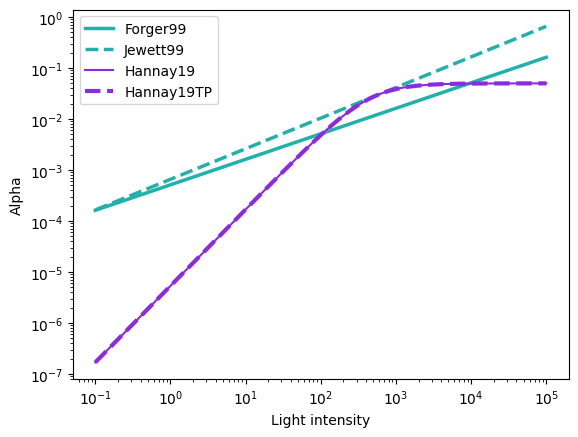

In [31]:
for model in model_list:
    light = np.logspace(-1, 5, 1000)
    alpha = alpha_type[str(model)]
    response = alpha(light, alpha_0[str(model)], p[str(model)], I_0[str(model)])
    plt.plot(light, response, label=str(model), lw=linewidths[str(model)], color=colors[str(model)], 
             linestyle=linestyles[str(model)])

plt.legend()
plt.xlabel("Light intensity")
plt.ylabel("Alpha")
plt.xscale('log')
plt.yscale('log')
plt.show()

